# IPython Notebook to animate the results provided by our solver of the time-dependent Schroedinger equation for a quantum mechanical point particle

## Importing the required libraries

In [52]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

## Set the path/ filename of the file the contains the evolution of the wave function and the file that contains the potential here

In [53]:
inputfilePath = 'sample_data/hydr_wavefunction_output_real.txt'
inputfilePathImag = 'sample_data/hydr_wavefunction_output_imag.txt'
potentialfilePath = 'sample_data/hydr_potential.txt'
observablesfilePath = 'sample_data/hydr_observables_output.txt'

## Read the data from the files and save it in lists of floats

In [54]:
e = 1.602176634*1e-19

potData = []
with open(potentialfilePath,'r') as potentialfile:
    for line in potentialfile:
        potData.append(line.strip())
    a = float(potData[0].split("\t")[1])
    epsilon = float(potData[0].split("\t")[3])
    tauhat = float(potData[0].split("\t")[5])
    del potData[0]
    potData = [float(potData[i])*epsilon/e*1e3 for i in range(len(potData))]

plotData = []
with open(inputfilePath,'r') as inputfile: #Read the file at the path specified above
    for line in inputfile: #Iterate over all lines
        plotData.append(line.strip().split('\t')) #Tab is used as seperator between values
    for j in range(len(plotData)): #Cast list items from string to float type
        plotData[j] = [float(plotData[j][i])*a**2*1e10 for i in range(len(plotData[0]))]
    plotData = np.array(plotData)
        
plotDataImag = []
with open(inputfilePathImag,'r') as inputfileImag: #Read the file at the path specified above
    for line in inputfileImag: #Iterate over all lines
        plotDataImag.append(line.strip().split('\t')) #Tab is used as seperator between values
    for j in range(len(plotDataImag)): #Cast list items from string to float type
        plotDataImag[j] = [float(plotDataImag[j][i])*a**2*1e10 for i in range(len(plotDataImag[0]))]
    plotDataImag = np.array(plotDataImag)
    
obsData = []
with open(observablesfilePath,'r') as obsfile:
    for line in obsfile:
        obsData.append(line.strip().split('\t'))
    for j in range(len(obsData)):
        obsData[j] = [float(obsData[j][i]) for i in range(len(obsData[0]))]
    obsData = np.array(obsData).T

## Find the absolute maximum of the wave function over the whole time to use it as the y- maximum of the plot

In [55]:
maximum = 0.0 #Initialise a variable to store the absolute maximum of all wave functions

for i in range(len(plotData)): #Iterate over all time steps
    if max(plotData[i]) > maximum: #If the maximum in the current time step is bigger than the maximum up to here...
        maximum = max(plotData[i]) #...set it as the new maximum

## Generate a series of plots that is shown over time. Each plot contains the wave function at consecutive points in the simulation

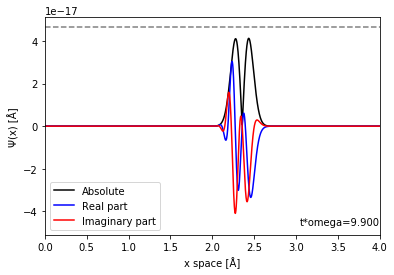

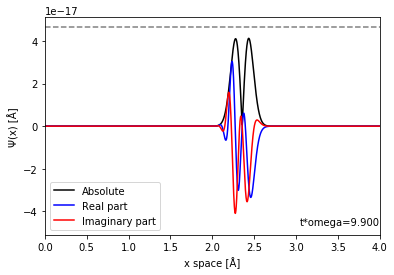

In [56]:
x = np.arange(0,len(plotData[0]))*a/1e-10 #Setting x-axis here

fig, ax = plt.subplots() #Generate an empty plot
l, = ax.plot([min(x),max(x)],[-maximum*1.1,maximum*1.1]) #Set plot range

def animate(i):
    plt.clf()
    plt.plot(x,np.sqrt(plotData[i]**2+plotDataImag[i]**2), color="black", label ="Absolute")
    plt.plot(x,plotData[i], color="blue", label="Real part")
    plt.plot(x,plotDataImag[i], color="red", label="Imaginary part")
    plt.axhline(max(plotData[0]),linestyle = 'dashed', color = 'grey') #Add a dashed grey line as reference for the maximum of the start wave function
    plt.xlim(min(x),max(x)) #Set the overwritten plot range again
    plt.ylim(-maximum*1.1,maximum*1.1)
    plt.xlabel("x space [Å]")
    plt.ylabel("Ψ(x) [Å]")
    plt.text(max(x),-maximum,"t*omega=%02.3f"%(obsData[0][i]),horizontalalignment='right')
    plt.legend()

for i in range(len(plotData)): #Iterate over all plots
    animate(i)
    clear_output(wait=True)
    display(fig)
    
plt.show()

## Graphical output of the observables
### Valid values for obs are:
###    - "norm-1"  to display the time evolution of the normalisation minus 1
###    - "energy"  to display the time evolution of the energy expectation value
###    - "x"  to display the time evolution of the spacial coordinate expectation value
###    - "p"  to display the time evoltuion of the momentum expectation value

In [63]:
obs = "p"

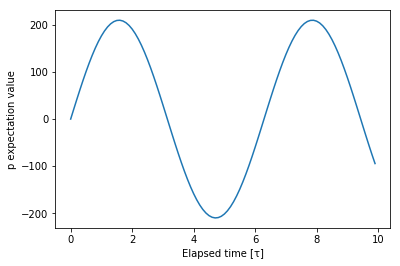

In [64]:
if(obs == "norm-1"):
    plt.plot(obsData[0],obsData[1])
    plt.xlabel("Elapsed time [τ]")
    plt.ylabel("Absolute deviation from 1")
    plt.show()
    
elif(obs == "energy"):
    plt.plot(obsData[0],obsData[2]*epsilon/e*1e3)
    plt.xlabel("Elapsed time [τ]")
    plt.ylabel("Energy [meV]")
    plt.show()
    
elif(obs == "x"):
    plt.plot(obsData[0],obsData[3]*a*1e10)
    plt.xlabel("Elapsed time [τ]")
    plt.ylabel("x expectation value [Å]")
    plt.show()
    
elif(obs == "p"):
    plt.plot(obsData[0],obsData[4])
    plt.xlabel("Elapsed time [τ]")
    plt.ylabel("p expectation value")
    plt.show()
    
else:
    print("Invalid value!")